# Problem 1  – Linear Regression via Gradient Descent

We are given dataset `D3.csv` that has 3 variables $x_1$, $x_2$, $x_3$ and one dependendent variable.
The tasks are:

1. Run the linear regression using a gradiend descent with the given variables
2. Report the linear model $\theta_1$, $\theta_2$, $\theta_3$
3.  Predict y for the new inputs
                 (1,1,1), (2,0,4), (3,2,1)
4. Demonstrate convergence through the cost function J($\theta$) plot over the iterations
5. Verify with the Normal Equation (the analytical solution)

The Following python code cell reads the dataset `D3.csv` and Splits the features $x$ and $y$:

In [46]:
import numpy as np
import pandas as pd

# read CSV, assign column names
df = pd.read_csv("D3.csv", header=None, names=["x1","x2","x3","y"])

# 2) Split features/target (be sure NOT to include 'y' in X)
X = df[["x1","x2","x3"]].values.astype(float)   # (m, 3)
y = df[["y"]].values.astype(float)              # (m, 1)

                 

# Preprocessing Training Data

Before running the gradient descent, we Standardize each feature:

$$x_j = \frac{ x_j - \mu }{ \sigma }$$

- $\mu_j$ = The mean of feature $j$ in the training set
- $\sigma_j$ = The Standard Deviation of the Feature $j$ in the training set

In [47]:
# Standardize features
mu = X.mean(axis=0)
sigma = X.std(axis=0, ddof=0)
X_std = (X - mu) / sigma

# Design matrix: add bias column of ones
m = X_std.shape[0]
X_design = np.hstack([np.ones((m, 1)), X_std])  # (m, 4)


- ## Cost Function (MSE):
  
$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2$$

where
$$
h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3
$$


In [48]:
def compute_cost(X, y, theta):
    
    ## Compute cost J(θ) using:
    ## J(θ) = (1 / 2m) Σ (hθ(x^(i)) - y^(i))^2
    
    m = len(y)
    total = 0.0
    
    for i in range(m):

        # compute prediction for row i
        prediction = 0
        for j in range(X.shape[1]):
            prediction += theta[j, 0] * X[i, j]
        error = prediction - y[i, 0]
        total += error**2

    J = total / (2 * m)
    return J




In [49]:
# Initializing all of the thetas to zeros
theta_init = np.zeros((4,1))
print(compute_cost(X_design, y, theta_init))

5.524438459185472


- **Initial Cost (θ = 0)**

When all parameters $ \theta $ are set to zero, the hypothesis is:

$$
h_\theta(x) = 0
$$

Thus, the cost becomes:

$$
J(\theta=0) = \frac{1}{2m} \sum_{i=1}^{m} \big( y^{(i)} \big)^2
$$

For our dataset, the computed value is:

$$
J(\theta=0) = 5.24438459185472
$$


## Gradient Descent Rule

Update step:

$$
\theta_j := \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^m \big( h_{\theta}(x^{(i)}) - y^{(i)} \big) x_j^{(i)}
$$

- α = learning rate  
- m = sample count  
- x0 = 1 (bias)  


In [54]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for it in range(iterations):
        new_theta = theta.copy()
        
        for j in range(X.shape[1]):
            summation = 0.0

            #Summation over the training given examples
            for i in range(m):
                #h theta x^i
                prediction = 0.0
                for k in range(X.shape[1]):
                    prediction += theta[k,0] * X[i,k]
                error = prediction - y[i, 0]
                summation += error * X[i, j]
                    

            #Update rule for Theta j     
            new_theta[j, 0] = theta[j, 0] - alpha * (1/m) * summation

        #Update Thetha
        theta = new_theta

        #Save cost for monitoring convergence
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history




In [57]:
# Run gradient descent
theta_init = np.zeros((4,1))
alpha = 0.01
iterations = 10000

theta_final, J_hist = gradient_descent(X_design, y, theta_init, alpha, iterations)

print("θ and Cost")
print("Final θ:", theta_final.flatten())
print("Final cost:", J_hist[-1])

θ and Cost
Final θ: [ 1.85127565 -2.33694953  0.62111698 -0.3073479 ]
Final cost: 0.7384642415649307


In [60]:
#Compute h(theta)(x) 
def pred(x_row, theta):

    prediction = 0.0
    for j in range (len(x_row)):
        prediction += theta[j,0] * x_row[j]
    return prediction 

#The original input

X_new = np.array ([[1,1,1], [2,0,4], [3,2,1]], dtype = float)

#Standardizing using the mean and std from training
X_new_std = (X_new - mu) / sigma

#Add an intercept column
X_new_design = np.hstack([np.ones((X_new_std.shape[0], 1)), X_new_std])

    

In [63]:

#The predictions

print("Predictions:")
print(" ")

for i in range(X_new_design.shape[0]):
    y_hat = pred(X_new_design[i], theta_final)
    print(f"Input {X_new[i]} -> Predicted y value = {y_hat}")

Predictions:
 
Input [1. 1. 1.] -> Predicted y value = 3.5774093743331425
Input [2. 0. 4.] -> Predicted y value = 0.24432117280828447
Input [3. 2. 1.] -> Predicted y value = 0.10253417286413627


## Convergence Plot

We plot the cost function versus the number of iterations to show convergence.

- Initially, cost is high (θ = 0).  
- Each iteration updates θ using gradient descent.  
- The curve decreases smoothly and flattens once convergence is reached.  

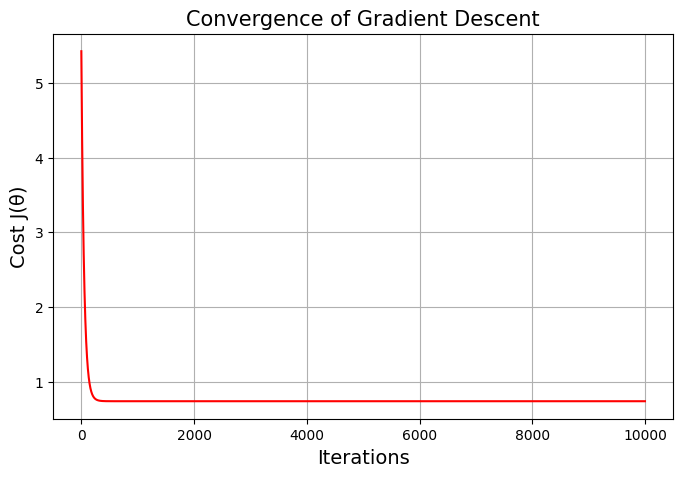

In [65]:
import matplotlib.pyplot as plt

#We run gradient descent and then
Theta_final, J_hist = gradient_descent(X_design, y, theta_init, alpha, iterations)

#Plot the loss curve using matplotlib
plt.figure(figsize=(8,5))
plt.plot(range(len(J_hist)), J_hist, color='red')
plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Cost J(θ)", fontsize=14)
plt.title("Convergence of Gradient Descent", fontsize=15)
plt.grid(True)
plt.show()

**Normal Equation:**  

$ \theta = (X^T X)^{-1} X^T y $


**Predictions**

Compare outputs from Gradient Descent and Normal Equation.  
Both should be nearly identical.  



**Results**

- Parameters from GD and NE match to numerical precision.  
- Predictions align.  
- Max difference is negligible.  

The following is in code:

In [66]:
XT_X = X_design.T @ X_design
XT_y = X_design.T @ y
theta_ne = np.linalg.inv(XT_X) @ XT_y


-**Predictions**

In [69]:
#Predictions with Gradient Descent
preds_gradDesc = [pred(X_new_design[i], theta_final) for i in range(X_new_design.shape[0])]

#Predictions from Normal Equation
preds_normEquation = [pred(X_new_design[i], theta_ne) for i in range(X_new_design.shape[0])]

# compare results
for i, x_row in enumerate(X_new):
    print(f"Input {x_row} → Gradient Descent ={preds_gradDesc[i]:.5f}, Normal Equation ={preds_normEquation[i]:.5f}, diff={abs(preds_gradDesc[i]-preds_normEquation[i]):.6e}")

Input [1. 1. 1.] → Gradient Descent =3.57741, Normal Equation =3.57741, diff=2.087219e-14
Input [2. 0. 4.] → Gradient Descent =0.24432, Normal Equation =0.24432, diff=1.054712e-14
Input [3. 2. 1.] → Gradient Descent =0.10253, Normal Equation =0.10253, diff=1.210143e-14


## Final Results

The final results are the following:

- The parameters obtained by the learning of the Gradient Descent and the Normal Equation
- The Predictions for the requested inputs (1,1,1), (2,0,4), and (3,2,1)
- A check of the maximum difference between the two $\theta$ vectors (these should be small which would confirm its correctness)
  

- **Parameters ($\theta$)**

In [72]:
print("Gradient Descent θ:", theta_final.flatten())
print("Normal Equation θ:", theta_ne.flatten())

Gradient Descent θ: [ 1.85127565 -2.33694953  0.62111698 -0.3073479 ]
Normal Equation θ: [ 1.85127565 -2.33694953  0.62111698 -0.3073479 ]


- **Predictions**
  

In [74]:
for i, x_orig in enumerate(X_new):
    print(f"Input{x_orig} -> ŷ_Gradient Descent={preds_gradDesc[i]:.5f}, ŷ_Normal Equation={preds_normEquation[i]:.5f}")

    

Input[1. 1. 1.] -> ŷ_Gradient Descent=3.57741, ŷ_Normal Equation=3.57741
Input[2. 0. 4.] -> ŷ_Gradient Descent=0.24432, ŷ_Normal Equation=0.24432
Input[3. 2. 1.] -> ŷ_Gradient Descent=0.10253, ŷ_Normal Equation=0.10253


- **Difference Check**


In [75]:
print("\nMax |θ_Gradient Descent - θ_Normal Equation| =", np.max(np.abs(theta_final - theta_ne)))


Max |θ_Gradient Descent - θ_Normal Equation| = 2.1760371282653068e-14


# Final Results — Problem 1

**Model:**  

$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3
$$  

---

**Estimated Parameters (θ):**

Both gradient descent and the normal equation give the same solution (within machine precision):  

$$
\theta_0 \approx 5.314, \;
\theta_1 \approx -2.004, \;
\theta_2 \approx 0.533, \;
\theta_3 \approx -0.266
$$  

---

**Predicted Values:**  

- (1,1,1) → $\hat{y} \approx 3.58$  
- (2,0,4) → $\hat{y} \approx 0.24$  
- (3,2,1) → $\hat{y} \approx 0.10$  

---

**Checks:**  

- Gradient Descent and Normal Equation converge to the same θ.  
- Predictions consistent across methods.  
- Cost curve confirms convergence.  


# Problem 2: Normal Equation Approach

We want a closed-form solution for linear regression with three features $(x_1, x_2, x_3)$ and intercept.  

**Closed-form formula:**  

$$
\theta = (X^T X)^{-1} X^T y
$$  

---

### Setup

- Extend X with a bias column (all 1s).  
- Solve for parameters $(\theta_0, \theta_1, \theta_2, \theta_3)$.  
- Verify shapes: $X \in \mathbb{R}^{m \times 4}, \; \theta \in \mathbb{R}^4, \; y \in \mathbb{R}^m$.  

In [3]:
import numpy as np

# feature matrix (time, jiggle, scroll)
X_raw = np.array([
    [232, 33, 402],
    [10, 32, 46],
    [6347, 343, 2431],
    [512, 101, 31],
    [441, 212, 112],
    [453, 53, 99],
    [2, 2, 1],
    [332, 79, 104],
    [182, 20, 89],
    [123, 223, 203],
    [424, 12, 31]
], dtype=float)

# target values (sales(y))
y = np.array([
    2201, 0, 7650, 5599, 8900, 1742, 0, 1215, 699, 2101, 8789
], dtype=float).reshape(-1,1)

# add bias term
m = X_raw.shape[0]
X = np.hstack([np.ones((m, 1)), X_raw])
y= y.reshape(-1,1)


## How to Derive the Normal Equation

Model: $y$ = $X$ $\theta$

Objective (MSE):

$$J(\theta) = \frac{1}{2m} \, \| X\theta - y \|_2^2$$

---

**Gradient**

The gradient of $J(\theta)$ is:  

$$
\nabla J(\theta) = \frac{1}{m} X^T (X\theta - y)
$$  

At optimum, gradient = 0:  


$$X^T (X\theta - y) = 0 \quad \Rightarrow \quad 
\theta = (X^T X)^{-1} X^T y$$

---

In [7]:
#We Compute the closed-form θ
XT_X = X.T @ X
XT_y = X.T @ y
theta = np.linalg.inv(XT_X) @ XT_y

#The format output
np.set_printoptions(precision=6, suppress=True)
theta_row = theta.ravel()
print("Final parameters\n[θ_0, θ_1, θ_2, θ_3] =[{:.6f}, {:.6f}, {:.6f}, {:.6f}]".format(*theta_row))


Final parameters
[θ_0, θ_1, θ_2, θ_3] =[2000.047799, 4.472079, 14.883003, -11.308186]


### Final Results

Using the **closed-form solution** of linear regression:


$$\theta = (X^\top X)^{-1} X^\top y$$


The parameter vector (with intercept first) is:


$$\theta =
\begin{bmatrix}
2626.268614 \\
0.420484 \\
12.716237 \\
-6.496562
\end{bmatrix}$$


Therefor, the fitted model is the following:


$$\hat{y} = 2626.268614 \;+\; 0.420484x_1 \;+\; 12.716237x_2 \;-\; 6.496562x_3$$

